In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Загружаем выбору точек

In [2]:
df = pd.read_excel('RGZ-2-MF-5152.xlsx', header=None)
df = df.fillna(method='ffill').dropna().set_index(0)
X = df.loc['ДЕЙНЕГА Олександр'][1:].values.astype(np.float64)

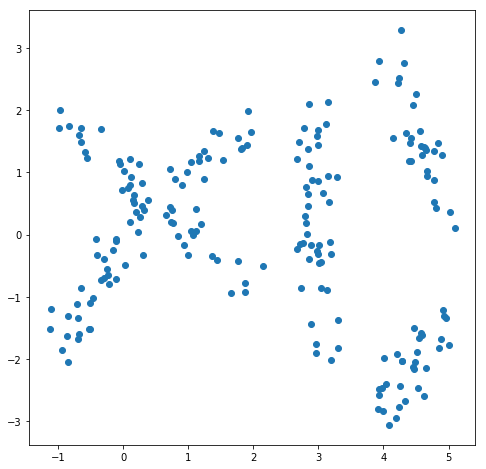

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1])
plt.show()

### Отрисуем гистограмму попарных расстояний между точками

In [4]:
from sklearn.metrics import pairwise_distances
rho = pairwise_distances(X)

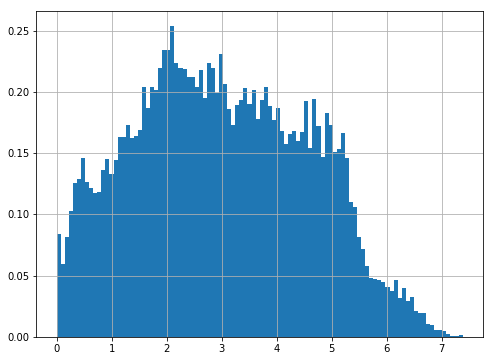

In [5]:
plt.figure(figsize=(8,6))
plt.hist(np.reshape(rho, -1), bins=100, normed=True)
plt.grid()
plt.show()

### Отрисуем зависимость числа компонент от R

In [6]:
from scipy.cluster.hierarchy import fclusterdata

rs = np.arange(0.01, 0.8, 0.01)
n_clusters = [len(set(fclusterdata(X, r, criterion='distance'))) for r in rs]

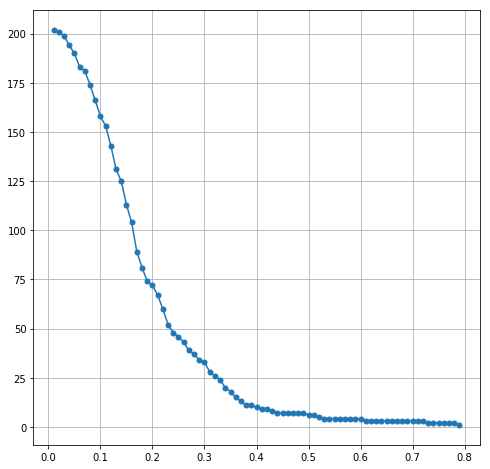

In [7]:
plt.figure(figsize=(8,8))
plt.plot(rs, n_clusters, 'o-', markersize=5)
plt.grid()
plt.show()

In [8]:
n_clusters_r_map = dict(zip(n_clusters, rs))
n_clusters_r_map

{1: 0.79,
 2: 0.78,
 3: 0.72,
 4: 0.6,
 5: 0.52,
 6: 0.51,
 7: 0.49,
 8: 0.43,
 9: 0.42000000000000004,
 10: 0.4,
 11: 0.39,
 13: 0.37,
 15: 0.36000000000000004,
 18: 0.35000000000000003,
 20: 0.34,
 24: 0.33,
 26: 0.32,
 28: 0.31,
 33: 0.3,
 34: 0.29000000000000004,
 37: 0.28,
 39: 0.27,
 43: 0.26,
 46: 0.25,
 48: 0.24000000000000002,
 52: 0.23,
 60: 0.22,
 67: 0.21000000000000002,
 72: 0.2,
 74: 0.19,
 81: 0.18000000000000002,
 89: 0.17,
 104: 0.16,
 113: 0.15000000000000002,
 125: 0.14,
 131: 0.13,
 143: 0.12,
 153: 0.11,
 158: 0.09999999999999999,
 166: 0.09,
 174: 0.08,
 181: 0.06999999999999999,
 183: 0.060000000000000005,
 190: 0.05,
 194: 0.04,
 199: 0.03,
 201: 0.02,
 202: 0.01}

### Отрисуем разбиения на интересующее нас количество кластеров

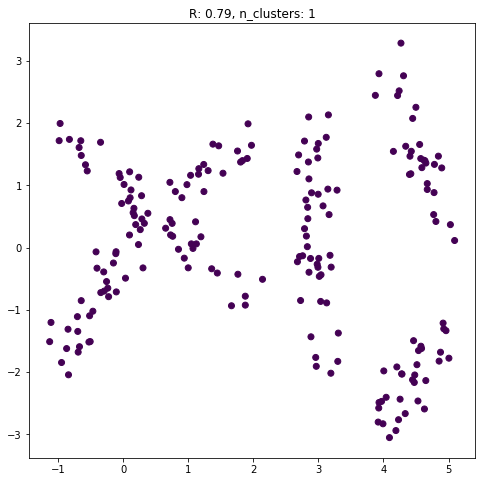

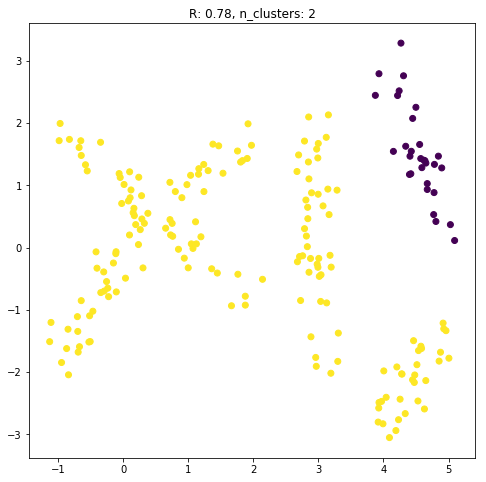

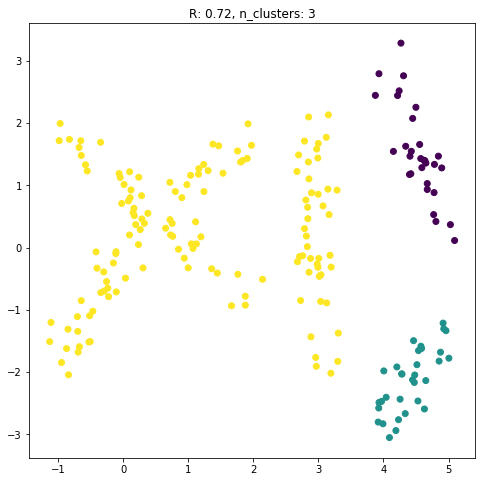

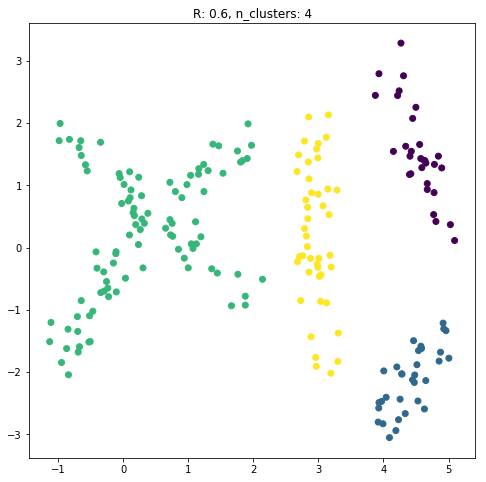

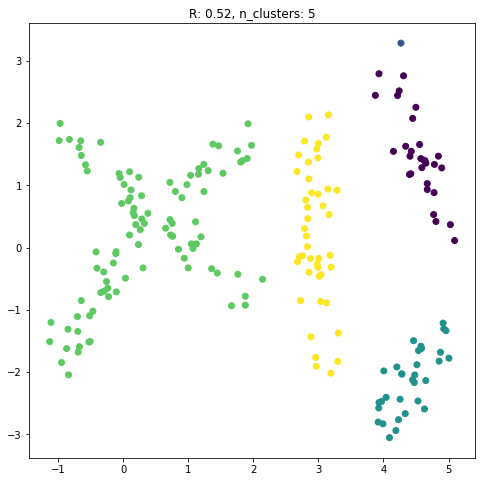

In [9]:
 for i in range(1, 6):
    labels = fclusterdata(X, n_clusters_r_map[i], criterion='distance')
    plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title('R: {}, n_clusters: {}'.format(n_clusters_r_map[i], i))
    plt.show()


### Отрисуем разбиение на кластеры с помощью агломеративной кластеризации, имея возможность задать колличество кластеров явно

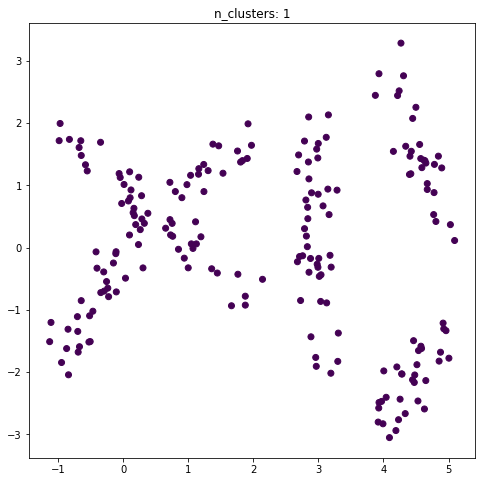

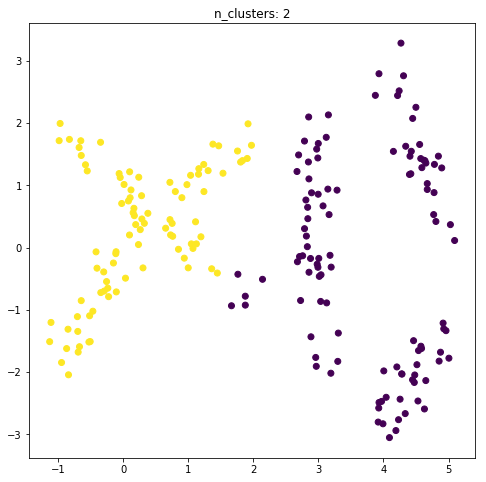

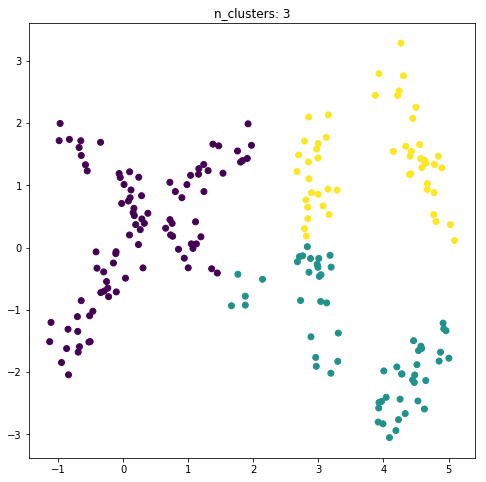

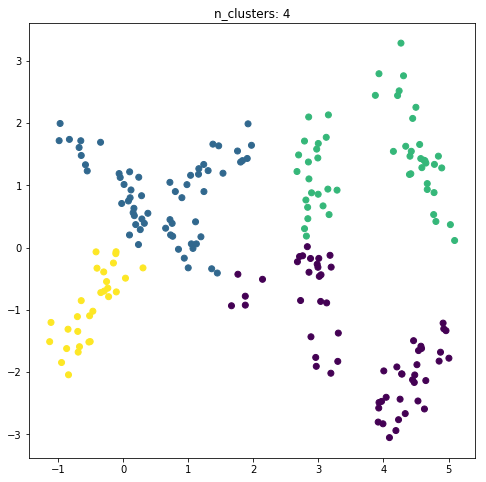

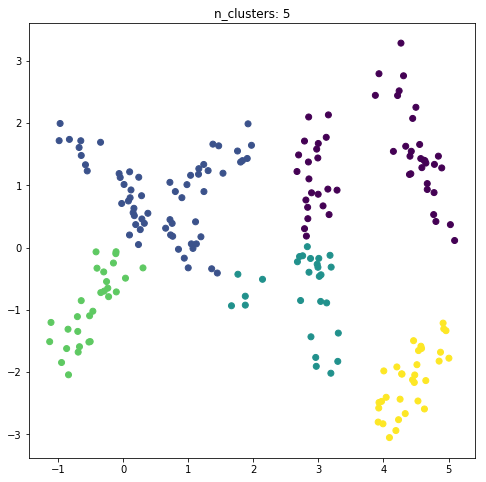

In [10]:
from sklearn.cluster import AgglomerativeClustering

for i in range(1, 6):
    labels = AgglomerativeClustering(n_clusters=i, linkage='ward').fit(X).labels_
    plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title('n_clusters: {}'.format(i))
    plt.show()